In [1]:
%autoreload

UsageError: Line magic function `%autoreload` not found.


In [2]:
import pickle as pkl
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from feature_extraction import Dataset
from 

In [3]:
with open("../data/train_test_out_time (1).pkl", "rb") as file:
    cross_val_dict = pkl.load(file)
# Biggest subset
data = cross_val_dict[-1]

In [4]:
departamentos = data['train'].departamento.unique()
window = 10

# Baseline

In [19]:
results = {}
baseline_predictions = {}
for departamento in departamentos:
    dataset = Dataset(window, departamento)
    train_dataset, val_dataset = dataset.get_data_set(data)
    data_aux = data['train']
    last_observation =  data_aux[data_aux.departamento == departamento].infectados.iloc[-1]
    y_pred = [last_observation/dataset.max_infectados]
    y = []
    for _, label in val_dataset:
        y_pred.append(label[0][0].numpy())
        y.append(label[0][0].numpy())
    baseline_predictions[departamento] = y_pred[:-1]
    y_pred = np.array(y_pred[:-1])
    y = np.array(y)
    MAPE = sum(abs(y - y_pred)/abs(y))/len(y)
    results[departamento] = MAPE
baseline_predictions

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


{'amazonas': [0.03664921465968586,
  0.04712042,
  0.03141361,
  0.0,
  0.05235602,
  0.010471204,
  0.04712042],
 'antioquia': [0.8099041533546326,
  0.5255591,
  1.586262,
  1.2380192,
  1.4904153,
  1.6821086,
  2.1629393],
 'arauca': [0.0, 0.14634146, 0.0, 0.31707317, 0.024390243, 0.0, 0.0],
 'atlantico': [0.642512077294686,
  0.5344203,
  0.6425121,
  0.46859902,
  1.187802,
  1.5778985,
  1.298913],
 'bogota': [0.7835738068812431,
  0.60414356,
  0.68331486,
  0.7118017,
  0.65482795,
  0.7783944,
  0.54679984],
 'bolivar': [0.6926713947990544,
  0.33096927,
  0.59101653,
  0.5886525,
  1.8581561,
  1.2340425,
  1.3758866],
 'boyaca': [0.3333333333333333,
  0.20833333,
  0.7083333,
  0.29166666,
  0.7916667,
  2.6666667,
  0.45833334],
 'caldas': [0.6153846153846154,
  0.0,
  0.15384616,
  0.30769232,
  1.3076923,
  1.3076923,
  1.3846154],
 'caqueta': [1.0, 0.4, 0.4, 0.26666668, 2.7333333, 0.8666667, 2.5333333],
 'casanare': [0.13333333333333333,
  0.26666668,
  0.6,
  0.4,
  0.

In [20]:
capitales = ['atlantico' , 'bogota', 'valle del cauca', 'antioquia']
metric = sum([results[capital] for capital in capitales])/len(capitales)
metric

0.4205066259628375

In [11]:
def get_model():
    model = Sequential()
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=9, activation='relu', padding='causal', input_shape=(10, 1)))
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=7, activation='relu', padding='causal'))

    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', padding='causal'))
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', padding='causal'))

    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

Epoch 1/100
4/4 [==============================] - 1s 142ms/step - loss: 0.0948 - val_loss: 0.0214
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0918 - val_loss: 0.0252
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0888 - val_loss: 0.0219
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0847 - val_loss: 0.0202
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0820 - val_loss: 0.0200
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0803 - val_loss: 0.0204
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0804 - val_loss: 0.0202
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0779 - val_loss: 0.0199
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0772 - val_loss: 0.0201
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0760 - val_loss: 0.0205
Epoch 11/100
4/4 [

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/100
4/4 [==============================] - 1s 155ms/step - loss: 0.1558 - val_loss: 1.3541
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1451 - val_loss: 1.2875
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1379 - val_loss: 1.2059
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1274 - val_loss: 1.0957
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1127 - val_loss: 0.9422
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0919 - val_loss: 0.7446
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0691 - val_loss: 0.5059
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0595 - val_loss: 0.3098
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0486 - val_loss: 0.3211
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0594 - val_loss: 0.3344
Epoch 11/100
4/4 [

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/100
4/4 [==============================] - 1s 132ms/step - loss: 0.1936 - val_loss: 0.7838
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1591 - val_loss: 0.6756
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1192 - val_loss: 0.5293
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0888 - val_loss: 0.4160
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0937 - val_loss: 0.3955
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0740 - val_loss: 0.4240
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0721 - val_loss: 0.4113
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0660 - val_loss: 0.3983
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0594 - val_loss: 0.4083
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0586 - val_loss: 0.4188
Epoch 11/100
4/4 [

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/100
4/4 [==============================] - 1s 134ms/step - loss: 0.0958 - val_loss: 1.9861
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0937 - val_loss: 1.9582
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0927 - val_loss: 1.9263
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0902 - val_loss: 1.8723
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0872 - val_loss: 1.8127
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0842 - val_loss: 1.7221
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0815 - val_loss: 1.6491
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0769 - val_loss: 1.5731
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0716 - val_loss: 1.5240
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0680 - val_loss: 1.4985
Epoch 11/100
4/4 [

4/4 [==============================] - 0s 15ms/step - loss: 0.1074 - val_loss: 0.1533
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1027 - val_loss: 0.1653
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1018 - val_loss: 0.1576
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1004 - val_loss: 0.1510
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0990 - val_loss: 0.1524
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0987 - val_loss: 0.1545
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0958 - val_loss: 0.1506
Epoch 11/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0936 - val_loss: 0.1530
Epoch 1/100
4/4 [==============================] - 1s 137ms/step - loss: 0.1110 - val_loss: 0.8628
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0911 - val_loss: 0.7602
Epoch 3/100
4/4 [============

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/100
4/4 [==============================] - 1s 144ms/step - loss: 0.1530 - val_loss: 1.0863
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1448 - val_loss: 1.0363
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1357 - val_loss: 0.9786
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1227 - val_loss: 0.9130
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1024 - val_loss: 0.8117
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0783 - val_loss: 0.6601
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0813 - val_loss: 0.5434
Epoch 8/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0805 - val_loss: 0.5506
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0727 - val_loss: 0.6278
Epoch 10/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0765 - val_loss: 0.6838
Epoch 11/100
4/4 [

Epoch 11/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0624 - val_loss: 0.1745
Epoch 12/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0602 - val_loss: 0.1605
Epoch 13/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0594 - val_loss: 0.1655
Epoch 14/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0588 - val_loss: 0.1590
Epoch 15/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0573 - val_loss: 0.1630
Epoch 16/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0562 - val_loss: 0.1621
Epoch 17/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0550 - val_loss: 0.1595
Epoch 18/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0543 - val_loss: 0.1492
Epoch 19/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0567 - val_loss: 0.1763
Epoch 20/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0541 - val_loss: 0.1426
Epoch 21/1

Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0324 - val_loss: 0.5370
Epoch 11/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0320 - val_loss: 0.5341
Epoch 12/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0323 - val_loss: 0.5333
Epoch 13/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0321 - val_loss: 0.5349
Epoch 14/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0322 - val_loss: 0.5307
Epoch 15/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0319 - val_loss: 0.5293
Epoch 16/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0316 - val_loss: 0.5288
Epoch 17/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0317 - val_loss: 0.5220
Epoch 18/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0317 - val_loss: 0.5189
Epoch 19/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0312 - val_loss: 0.5123
Epoch 20/1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/100
4/4 [==============================] - 1s 126ms/step - loss: 0.1163 - val_loss: 0.5413
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1099 - val_loss: 0.5113
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1093 - val_loss: 0.5225
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1069 - val_loss: 0.5295
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1049 - val_loss: 0.5175
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1037 - val_loss: 0.5025
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1030 - val_loss: 0.5003
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1012 - val_loss: 0.4913
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0999 - val_loss: 0.4763
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0989 - val_loss: 0.4635
Epoch 11/100
4/4 [

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/100
4/4 [==============================] - 1s 154ms/step - loss: 0.1463 - val_loss: 0.8207
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1319 - val_loss: 0.7501
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1167 - val_loss: 0.6536
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0990 - val_loss: 0.5228
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0815 - val_loss: 0.3881
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0798 - val_loss: 0.3365
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0799 - val_loss: 0.3532
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0746 - val_loss: 0.3845
Epoch 9/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0717 - val_loss: 0.3651
Epoch 10/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0710 - val_loss: 0.3576
Epoch 11/100
4/4 [

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


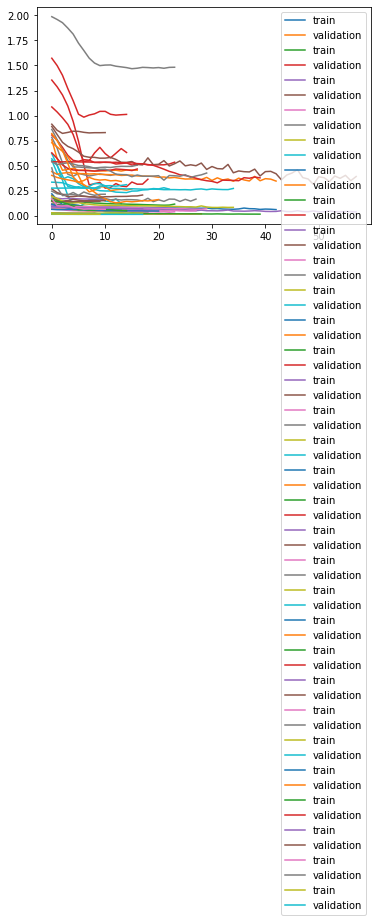

In [12]:
results = {}
for departamento in departamentos:
    dataset = Dataset(window, departamento)
    train_dataset, val_dataset = dataset.get_data_set(data)
    # define model 
    model = get_model()
    model.compile(loss="mae",
    optimizer="adam")
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', #val_loss
                                               patience=8,
                                               mode='min',
                                                restore_best_weights=True)
    history = model.fit(train_dataset.batch(32), 
                    validation_data=val_dataset.batch(1),
                    epochs=100, 
                    callbacks = [es_callback])
    plt.plot(history.history['loss'],  label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    preds = model.predict(val_dataset.batch(1))
    y_pred = np.ndarray.flatten(preds)*dataset.max_infectados
    y = np.array([ y.numpy()[0][0] for x, y in val_dataset ])*dataset.max_infectados
    MAPE = sum(abs(y - y_pred)/abs(y))/len(y)
    results[departamento] = MAPE

Epoch 1/100
4/4 [==============================] - 1s 151ms/step - loss: 0.0886 - val_loss: 0.2645
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0837 - val_loss: 0.2419
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0837 - val_loss: 0.2285
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0828 - val_loss: 0.2225
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0800 - val_loss: 0.2171
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0770 - val_loss: 0.2103
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0746 - val_loss: 0.2087
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0716 - val_loss: 0.2049
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0681 - val_loss: 0.1962
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0661 - val_loss: 0.1910
Epoch 11/100
4/4 [

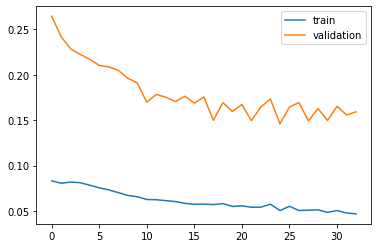

In [62]:
dataset = Dataset(window, 'meta')
train_dataset, val_dataset = dataset.get_data_set(data)
# define model 
model = get_model()
model.compile(loss="mae",
optimizer="adam")
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', #val_loss
                                           patience=8,
                                           mode='min',
                                            restore_best_weights=True)
history = model.fit(train_dataset.batch(32), 
                validation_data=val_dataset.batch(1),
                epochs=100, 
                callbacks = [es_callback])
plt.plot(history.history['loss'],  label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
preds = model.predict(val_dataset.batch(1))
y_pred = np.ndarray.flatten(preds)*dataset.max_infectados
y = np.array([ y.numpy()[0][0] for x, y in val_dataset ])*dataset.max_infectados
MAPE = sum(abs(y - y_pred)/abs(y))/len(y)
results[departamento] = MAPE

In [16]:
results

{'amazonas': inf,
 'antioquia': 0.28621927382690565,
 'arauca': inf,
 'atlantico': 0.41165473950760706,
 'bogota': 0.13779431794370925,
 'bolivar': 0.38422119689805967,
 'boyaca': 0.5062492218733367,
 'caldas': inf,
 'caqueta': 0.9511966577598027,
 'casanare': 0.7228883366499629,
 'cauca': 1.7005074716040067,
 'cesar': 0.5695307052561215,
 'choco': 0.8409148773976735,
 'cordoba': 0.493823464273841,
 'cundinamarca': 0.3454199263027736,
 'huila': inf,
 'la guajira': 0.9504681559545654,
 'magdalena': 0.3462293914386204,
 'meta': 0.8705292535679681,
 'narino': 0.38276987995154094,
 'norte de santander': 1.4228932093828917,
 'putumayo': 1.8532059746129173,
 'quindio': inf,
 'risaralda': 0.5819468923977443,
 'san andres y providencia': inf,
 'santander': 0.4352697639593056,
 'sucre': 0.9328445877347674,
 'tolima': 0.35265152688537327,
 'valle del cauca': 0.3387369024567306,
 'vaupes': inf}

In [18]:
capitales = ['atlantico' , 'bogota', 'valle del cauca', 'antioquia']
metric = sum([results[capital] for capital in capitales])/len(capitales)
metric

0.29360130843373816

## Add a moving averge